## Notebook to explore players from NBA 2013 and using Kmeans clustering, group them together to find out similar players 

In [93]:
# import the required dependencies to carry out the work.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
data = pd.read_csv('nba_2013.csv') # reading the csv file
data.head() # display the top 5 records from the dataset
# visit https://en.wikipedia.org/wiki/Basketball_statistics to know more about the columns

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [95]:
print(data.shape) # print the shape of the dataset - 481 rows and 31 columns
data.info() #information about each column 

(481, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int

In [96]:
data.describe() #getting statistics on each column in the field

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [97]:
data.loc[:,['fg','fga']].mean() # to find the mean of fildgoals made vs attempted

fg     192.881497
fga    424.463617
dtype: float64

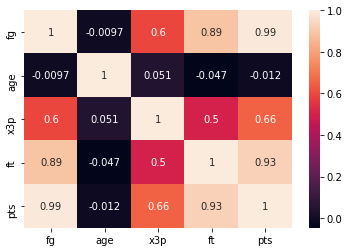

In [98]:
sns.heatmap(data[['fg','age','x3p','ft','pts']].corr(),annot= True) 

## Points made my a player is highly correlated to :
- Field goals - 99%
- Free Throws made (93%)
- 66% with 3 point shots
- Age is not a factor when considering Points

In [99]:
# let us cluster the players using KMeans clustering method
from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters = 5,random_state = 41) #create the kmeans model with 5 clusters
num_columns = data._get_numeric_data().dropna(axis = 1) #get only numeric data from dataset and remove missing data
kmean_model.fit(num_columns) #train the model
labels = kmean_model.labels_  #get the labels
print(labels)

[4 4 4 2 4 1 2 4 3 3 3 1 3 3 0 4 3 2 1 4 0 1 4 4 0 1 4 1 1 1 3 3 0 3 1 0 3
 2 3 1 4 2 4 0 4 3 1 1 4 3 3 3 3 1 1 3 4 3 0 2 0 3 0 1 3 1 1 1 1 4 1 0 0 3
 0 1 1 4 4 4 0 3 1 0 0 2 3 0 3 0 1 1 4 1 1 3 1 0 4 2 1 2 1 1 0 0 4 3 1 1 2
 3 1 1 1 2 4 3 1 1 1 4 0 2 0 4 4 4 2 2 3 0 0 2 1 1 2 1 4 4 0 0 4 1 0 1 3 1
 3 3 0 1 1 4 0 4 4 4 0 0 2 4 2 0 3 1 1 1 1 1 0 2 4 1 3 3 0 2 4 2 1 4 1 4 3
 2 3 1 1 4 1 1 1 0 4 0 4 2 0 4 0 0 0 3 0 3 1 0 4 1 1 4 2 4 3 2 3 3 2 1 0 0
 1 1 1 2 1 1 1 2 0 1 2 4 0 4 4 2 1 0 1 1 4 1 0 0 4 4 0 1 3 3 4 2 0 3 1 1 4
 3 1 1 0 1 0 2 1 0 1 4 4 1 2 0 3 4 0 2 2 1 3 4 0 3 4 4 0 1 2 1 1 3 4 4 1 1
 0 0 0 1 0 4 4 4 3 4 3 2 1 1 2 3 1 3 0 3 4 1 3 1 1 1 1 1 1 1 4 1 0 4 2 1 2
 1 4 4 1 0 3 1 1 4 3 1 0 2 3 0 0 4 0 1 3 0 1 1 1 4 1 1 4 3 1 1 1 2 4 1 4 3
 1 3 4 4 4 1 0 0 1 4 3 4 4 3 3 3 4 0 1 1 3 4 4 0 1 1 1 1 1 4 0 4 2 4 1 4 3
 1 2 4 1 3 0 0 4 1 2 1 3 4 1 1 1 2 1 1 3 3 2 0 3 1 4 0 4 1 2 1 4 4 0 3 1 3
 4 1 0 1 0 0 2 2 3 1 4 1 1 0 2 3 1 1 0 3 4 3 3 3 1 4 4 3 1 4 1 4 0 0 2 3 4]


- We get numbers between 0 to 4 - Meaning it has created 5 new clusters

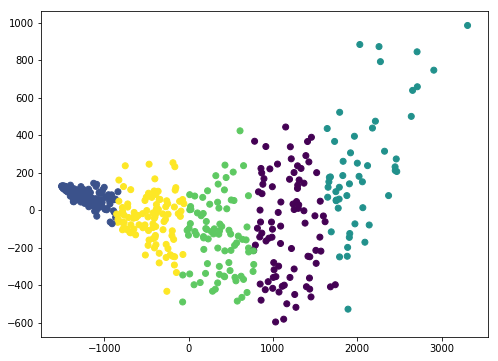

In [100]:
plt.figure(figsize=(8,6))
from sklearn.decomposition import PCA
pca = PCA(2)
plot_pca = pca.fit_transform(num_columns)
plt.scatter(x= plot_pca[:,0], y = plot_pca[:,1],c= labels)
plt.show() # we see that the labels have been clusteres

## Lets find how the clustering has been done for the players

In [101]:
#Find player LeBron
LeBron = num_columns.loc[data['player']=='LeBron James',:] 
#Find player Kevin Durant
KD = num_columns.loc[data['player']=='Kevin Durant',:]
KD

,age,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
133,25,81,81,3122,849,1688,192,491,657,1197,...,58,540,598,445,103,59,285,174,2593,2013


In [102]:
LeBron_list = LeBron.values.tolist() # kmeans model needs a list value and hence we changed it to list.
Kevin_list = KD.values.tolist()

In [103]:
print(kmean_model.predict(LeBron_list)) 
print(kmean_model.predict(Kevin_list))
# we check on which clusters do LeBron and Kevin belong to

[2]
[2]


In [104]:
cluster_map = pd.DataFrame() # a new dataframe
cluster_map['player_name'] = data.player.values # get the vlaues of players and add them to the dataframe
cluster_map['cluster_no.'] = labels #we add the clusters column to display 
cluster_map[cluster_map['cluster_no.'] == 4] ##displays the player of each cluster input

,player_name,cluster_no.
0,Quincy Acy,4
1,Steven Adams,4
2,Jeff Adrien,4
4,Alexis Ajinca,4
7,Lavoy Allen,4
...,...,...
469,Shawne Williams,4
470,Jeff Withey,4
473,Brandan Wright,4
475,Dorell Wright,4


## Let us predict the values using Linear Regression


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
plot_columns = pca.fit_transform(num_columns)

In [13]:
data.drop(['pos','season','season_end','bref_team_id'],axis=1,inplace =True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 27 columns):
player    481 non-null object
age       481 non-null int64
g         481 non-null int64
gs        481 non-null int64
mp        481 non-null int64
fg        481 non-null int64
fga       481 non-null int64
fg.       479 non-null float64
x3p       481 non-null int64
x3pa      481 non-null int64
x3p.      414 non-null float64
x2p       481 non-null int64
x2pa      481 non-null int64
x2p.      478 non-null float64
efg.      479 non-null float64
ft        481 non-null int64
fta       481 non-null int64
ft.       461 non-null float64
orb       481 non-null int64
drb       481 non-null int64
trb       481 non-null int64
ast       481 non-null int64
stl       481 non-null int64
blk       481 non-null int64
tov       481 non-null int64
pf        481 non-null int64
pts       481 non-null int64
dtypes: float64(5), int64(21), object(1)
memory usage: 101.6+ KB


In [15]:
new = data[['player','fta','fga','x3pa','pts']]
new

,player,fta,fga,x3pa,pts
0,Quincy Acy,53,141,15,171
1,Steven Adams,136,185,0,265
2,Jeff Adrien,119,275,0,362
3,Arron Afflalo,336,1011,300,1330
4,Alexis Ajinca,67,249,1,328
...,...,...,...,...,...
476,Tony Wroten,326,808,188,939
477,Nick Young,285,889,350,1144
478,Thaddeus Young,229,1283,292,1417
479,Cody Zeller,200,404,1,490


In [77]:
new.describe()

,fta,fga,x3pa,pts
count,481.000000,481.000000,481.000000,481.000000
mean,120.642412,424.463617,110.130977,516.582121
std,131.240639,368.850833,132.751732,470.422228
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,110.000000,3.000000,115.000000
50%,73.000000,332.000000,48.000000,401.000000
75%,179.000000,672.000000,193.000000,821.000000
max,805.000000,1688.000000,615.000000,2593.000000


In [16]:
dummies = pd.get_dummies(new.player)
dummies.head(3)

,A.J. Price,Aaron Brooks,Aaron Gray,Adonis Thomas,Al Harrington,Al Horford,Al Jefferson,Al-Farouq Aminu,Alan Anderson,Alec Burks,...,Wayne Ellington,Wesley Johnson,Wesley Matthews,Will Barton,Will Bynum,Willie Green,Wilson Chandler,Xavier Henry,Zach Randolph,Zaza Pachulia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data1 = pd.concat([dummies,new],axis = 1)


In [18]:
data1.drop(['player'],axis = 1,inplace =True)

In [19]:
X = data1.drop(['pts'],axis = 1)
y = data1['pts']

In [20]:
print(X.shape)
print(y.shape)

(481, 484)
(481,)


In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

In [80]:
y_test = y_test[:,np.newaxis]
y_train = y_train[:,np.newaxis]

In [81]:
y_train.shape

(384, 1)

In [82]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
Lr.score(X_test,y_test)

0.9905932319277109

In [117]:
def predict_points(player,fta,fga,x3pa):    
    loc_index = np.where(X.columns==player)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = fta
    x[1] = fga
    x[2] = x3pa
    if loc_index >= 0:
        x[loc_index] = 1

    return round(Lr.predict([x])[0][0])

In [134]:
# predict the points of Kevin Durant, if he took 1011 free throws, 136 field goals attempt and 300 3 pointer shots
predict_points('Kevin Durant',1010,136,300) 

4236.0

In [132]:
# the points LBJ would score if he took 1011 free throws, 136 field goals attempt and 300 3 pointer shots
predict_points('LeBron James',1011,136,300) 

4288.0